Inicio de primera parte

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as col
from sklearn.cluster import KMeans
import matplotlib.cm as mtcm
import pandas as pd

In [2]:
import requests
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

In [3]:
from bs4 import BeautifulSoup
import numpy as np
soup = BeautifulSoup(website_url, 'html')
table = soup.find('table')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-not-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pi

In [4]:
dicion_pc = {}
td = table.findAll('td')
for i in td: # Abrir cada td e navegar pelas tags
    try:
        postal_code = i.p.b.text # Coletando dados da tag b que está dentro da a Código portal
        neigh = i.span.text # bairros 
        boro = neigh.split('(')[0]
        pc_not = i.span.text # Possível código postal que esteja sem bairros 
        dicion_pc[postal_code] = {}
        try:
            ne = neigh.split('(')[1]
            ne = ne.replace('(', ' ')
            ne = ne.replace(')', ' ')
            neigh_nm = ne.split('/')
            neigh_clean = ', '.join([name.strip() for name in neigh_nm])
        except:
            boro = boro.strip('\n')
            neigh_clean = boro
        dicion_pc[postal_code]['Borough'] = boro
        dicion_pc[postal_code]['Neighborhoods'] = neigh_clean 
    except:
        pass
print(dicion_pc )

{'M1A': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M2A': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M3A': {'Borough': 'North York', 'Neighborhoods': 'Parkwoods'}, 'M4A': {'Borough': 'North York', 'Neighborhoods': 'Victoria Village'}, 'M5A': {'Borough': 'Downtown Toronto', 'Neighborhoods': 'Regent Park, Harbourfront'}, 'M6A': {'Borough': 'North York', 'Neighborhoods': 'Lawrence Manor, Lawrence Heights'}, 'M7A': {'Borough': "Queen's Park", 'Neighborhoods': 'Ontario Provincial Government'}, 'M8A': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M9A': {'Borough': 'Etobicoke', 'Neighborhoods': 'Islington Avenue'}, 'M1B': {'Borough': 'Scarborough', 'Neighborhoods': 'Malvern, Rouge'}, 'M2B': {'Borough': 'Not assigned', 'Neighborhoods': 'Not assigned'}, 'M3B': {'Borough': 'North York', 'Neighborhoods': 'Don Mills North'}, 'M4B': {'Borough': 'East York', 'Neighborhoods': 'Parkview Hill, Woodbine Gardens'}, 'M5B': {'Borough': 'Downtown Toron

In [6]:
columns = ['Postal_Code', 'Borough', 'Neighborhood']
df = pd.DataFrame(columns=columns)
df.head(20)
for postal_code in dicion_pc:
        boro = dicion_pc[postal_code]['Borough']
        nei = dicion_pc[postal_code]['Neighborhoods']
        new_row = {"Postal_Code": postal_code, "Borough": boro, "Neighborhood": nei}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
df.head(13)

,Postal_Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"


In [7]:
df1 = df[df.Borough != 'Not assigned']
df2 = df1.groupby(['Postal_Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2.head(10)

,Postal_Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [8]:
df2.shape

(103, 3)

Fin de primera parte

Inicio de segunda parte

In [9]:
geo_data = pd.read_csv('https://cocl.us/Geospatial_data')
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
geo_data.rename(columns={'Postal Code':'Postal_Code'},inplace=True)
dfF = pd.merge(df2,geo_data,on='Postal_Code')
dfF.head()

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


Fin de segunda parte

Inicio de tercera parte

In [11]:
dfF[(dfF['Borough']=='Downtown Toronto')]

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
36,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
42,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576
48,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817


In [12]:
df3 = dfF[dfF['Borough'].str.contains('Toronto',regex=False)]
df3

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
35,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


<Axes: xlabel='count', ylabel='Borough'>

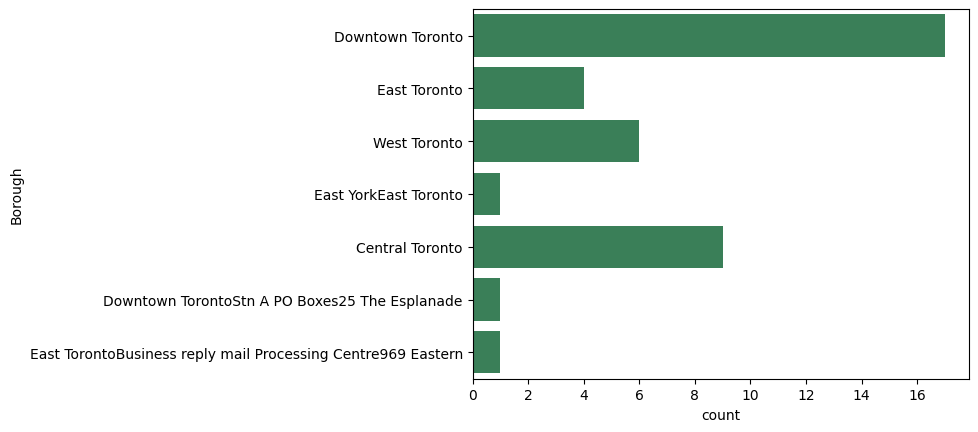

In [13]:
sns.countplot(y=df3['Borough'], color="seagreen")

In [14]:
neigh_Toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for N,E,bor,neighb in zip(df3['Latitude'],df3['Longitude'],df3['Borough'],df3['Neighborhood']):
    label = '{}, {}'.format(neighb, bor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([N,E], radius=5, popup=label, color='green', fill=True, fill_color='#006400', fill_opacity=0.1,
    parse_html=False).add_to(neigh_Toronto)
neigh_Toronto

Fin de tercera parte